In [49]:
#Importing the requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#Reading the data
data=pd.read_csv('Salarydata.csv')

In [51]:
#Checking the data values
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
#Taking the required input and outputs
X=(data.iloc[:,0].values)
y=(data.iloc[:,1].values)


In [53]:
#Finding the shape of X
X.shape

(30,)

In [54]:
#Finding the shape of y
y.shape

(30,)

In [55]:
#Creating a class of Linear Regression which works on Gradient Descent method
class LinearRegression:
    def __init__(self):
        self.m=0
        self.b=0
    def deriv(self,X,y):
        y_pred=self.m*X+self.b
        ss_m=(2) * sum(X * (y_pred-y))
        ss_b=(2) * sum(y_pred-y)
        return ss_m,ss_b
    def fit(self,X,y):
        for _ in range(1000):
            learning_rate=0.001
            s_m,s_b=self.deriv(X,y)
            if(s_m=='Nan' or s_b=='Nan'):
                return self
            else:
                self.m=self.m-(s_m*learning_rate)
                self.b=self.b-(s_b*learning_rate)
        return self
    def predict(self,X_test):
        return self.m*X_test+self.b
                
            
         

In [56]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [57]:
#Creating an object of my class
regressor=LinearRegression()

In [58]:
#Fitting the training data
regressor.fit(X_train,y_train)

In [59]:
#Predicting the output
y_pred=regressor.predict(X_test)
y_pred

array([ 40747.84610873, 122700.53693219,  64961.14112476,  63098.57996968,
       115250.29231188, 107800.04769156])

In [60]:
#Checking the accuracy of the model
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)*100
print("The accuracy is",accuracy)

The accuracy is 98.81723531509394


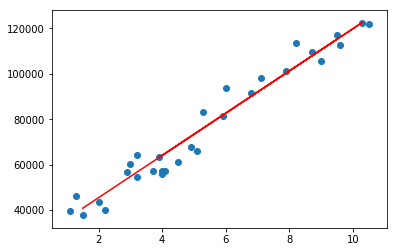

In [61]:
#Plotting the best fitted line
plt.plot(X_test,y_pred,color='red')
plt.scatter(X,y)